In [2]:
import xgboost
import shap

import numpy as np
import pandas as pd
from astropy.io import ascii
import matplotlib.pyplot as plt

In [3]:
raw_data = ascii.read('../data/raw/plti/kplr_dr25_inj1_plti.txt')
df = raw_data.to_pandas()
df.dropna()


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: TableReplaceWarning: converted column 'Fit_Provenance' from integer to float
  exec(code_obj, self.user_global_ns, self.user_ns)


,KIC_ID,Sky_Group,i_period,i_epoch,N_Transit,i_depth,i_dur,i_b,i_ror,i_dor,...,TCE_ID,Measured_MES,r_period,r_epoch,r_depth,r_dur,r_b,r_ror,r_dor,Fit_Provenance
5,11601794,8,71.3789,111.5236,15.1325,838.0,3.88664,0.3761,0.0232,133.934,...,011601794-01,8.4883,71.3804,182.8861,710.0,4.07025,0.499,0.0250,119.969,1.0
24,11752906,8,70.8269,67.1199,15.3007,1482.0,4.90840,0.4186,0.0353,104.314,...,011752906-02,13.3271,70.8261,137.9486,1443.0,4.81873,0.452,0.0347,104.531,1.0
32,11852982,8,21.6441,85.7861,50.6752,327.0,3.14444,0.2744,0.0143,51.445,...,011852982-02,10.4557,21.6441,150.7203,277.0,3.23718,0.860,0.0176,27.822,1.0
33,11853130,8,70.9432,101.2425,16.1289,1588.0,4.03196,0.4033,0.0293,128.272,...,011853130-02,9.5943,70.9436,172.1771,1240.0,3.74120,0.278,0.0321,143.978,1.0
34,11854219,8,31.3363,96.2654,34.3284,793.0,2.46341,0.5632,0.0233,83.388,...,011854219-01,7.8305,31.3365,158.9426,560.0,2.03661,0.060,0.0217,119.888,1.0
49,12005016,8,24.4795,88.3795,44.1366,769.0,2.73537,0.4184,0.0216,63.989,...,012005016-01,9.1802,24.4794,137.3401,606.0,2.57098,0.387,0.0227,68.869,1.0
53,12102169,8,36.9909,74.6180,29.1442,675.0,3.82006,0.2903,0.0198,72.569,...,012102169-01,7.5921,36.9894,148.6431,410.0,4.66318,0.045,0.0183,61.652,1.0
59,6579884,31,14.5834,76.6400,97.8850,618.0,2.58885,0.3223,0.0189,41.748,...,006579884-01,10.4117,14.5833,134.9820,398.0,2.41102,0.239,0.0183,45.742,1.0
60,6580019,31,63.3769,66.9085,6.0810,67281.0,2.26440,0.1094,0.7066,262.313,...,006580019-01,22.0327,63.3794,193.6341,718134.0,2.00000,0.100,0.4369,347.023,0.0
63,6665209,31,71.6247,97.1001,4.9041,230091.0,3.15378,0.2762,1.4799,246.570,...,006665209-01,53.1559,71.6226,168.7424,2348548.0,2.00000,0.100,0.5000,409.455,0.0


In [6]:
feat = ['Sky_Group', 'i_period', 'i_epoch', 'N_Transit', 'i_depth', 'i_dur', 'i_b', 'i_ror', 'i_dor']
features = raw_data[feat].to_pandas()

recoveredMatrix = raw_data[['Recovered']].to_pandas().as_matrix()
recovered = np.squeeze(np.asarray(recoveredMatrix))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [7]:
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(features, label=recovered), 100)

[11:22:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:22:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:22:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:22:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:22:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[11:22:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[11:22:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 106 extra nodes, 0 pruned nodes, max_depth=6
[11:22:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned nodes, max_depth=6
[11:22:26] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 108 extra nodes, 0 pruned no

[11:22:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[11:22:38] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:22:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[11:22:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned nodes, max_depth=6
[11:22:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:22:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[11:22:39] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 116 extra nodes, 0 pruned nodes, max_depth=6
[11:22:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 120 extra nodes, 0 pruned nodes, max_depth=6
[11:22:40] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 118 extra nodes, 0 pruned no

In [8]:
shap.initjs()

explainer = shap.TreeExplainer(model=model, feature_dependence='tree_path_dependent', model_output='margin')

In [9]:
shap_values = explainer.shap_values(X=features)

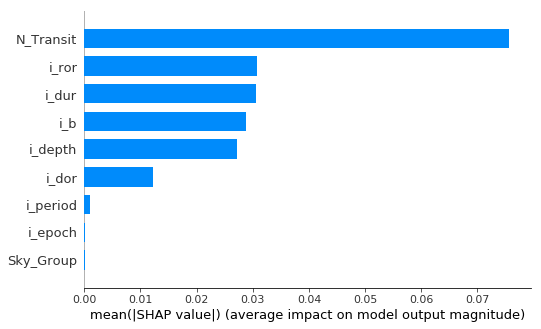

In [9]:
shap.summary_plot(shap_values, features, plot_type="bar")

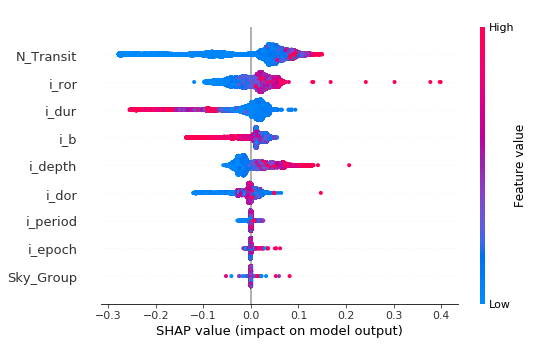

In [10]:
shap.summary_plot(shap_values, features)

In [ ]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=features)

/usr/local/lib/python3.7/site-packages/shap/plots/force.py:111: UserWarning: shap.force_plot is slow many thousands of rows, try subsampling your data.
  warnings.warn("shap.force_plot is slow many thousands of rows, try subsampling your data.")


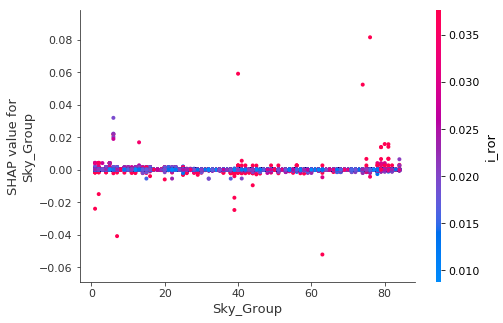

In [12]:
shap.dependence_plot(ind='Sky_Group', shap_values=shap_values, features=features)

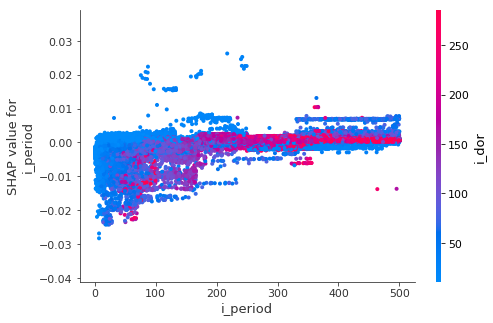

In [13]:
shap.dependence_plot(ind='i_period', shap_values=shap_values, features=features)

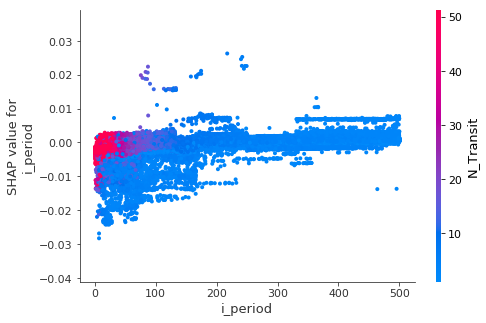

In [14]:
shap.dependence_plot(ind='i_period', shap_values=shap_values, features=features)

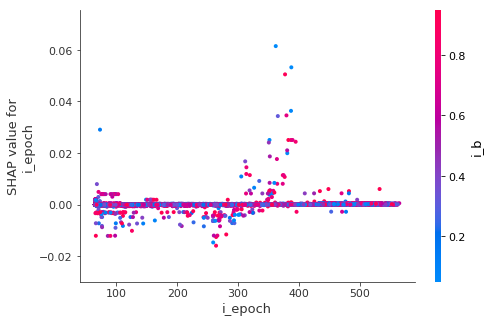

In [15]:
shap.dependence_plot(ind='i_epoch', shap_values=shap_values, features=features)

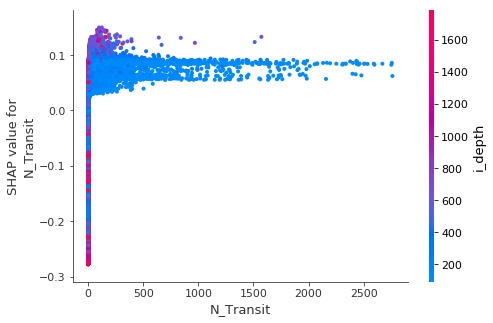

In [16]:
shap.dependence_plot(ind='N_Transit', shap_values=shap_values, features=features)

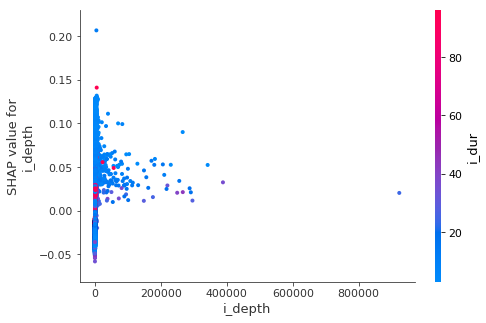

In [17]:
shap.dependence_plot(ind='i_depth', shap_values=shap_values, features=features)

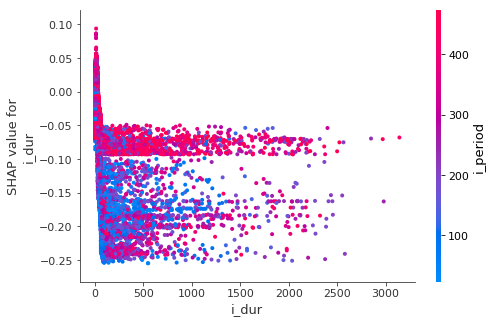

In [18]:
shap.dependence_plot(ind='i_dur', shap_values=shap_values, features=features)

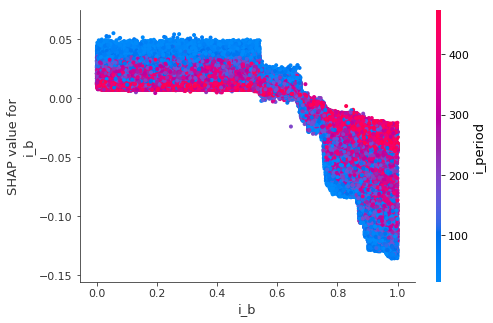

In [19]:
shap.dependence_plot(ind='i_b', shap_values=shap_values, features=features)

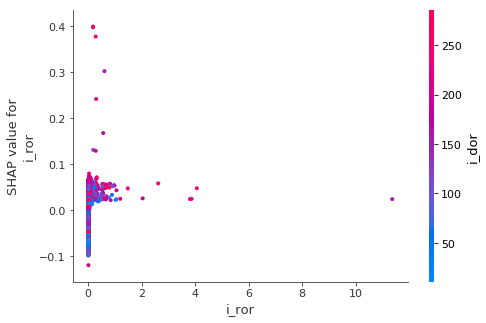

In [20]:
shap.dependence_plot(ind='i_ror', shap_values=shap_values, features=features)

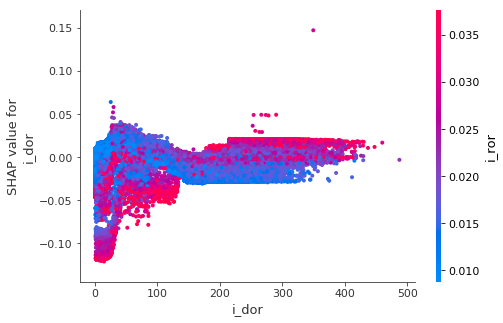

In [21]:
shap.dependence_plot(ind='i_dor', shap_values=shap_values, features=features)

In [35]:
sample = df.sample(n=1000, random_state=1)

sampledFeatures = sample[feat]

recoverdMatrix = sample[['Recovered']].as_matrix()
sampleRecovered = np.squeeze(np.asarray(recoverdMatrix))

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [36]:
len(sampledFeatures)
len(sampleRecovered)

1000

In [37]:
sampleModel = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(sampledFeatures, label=sampleRecovered), 100)

[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 70 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 72 extra nodes, 0 pruned nodes, max_depth=6
[11:40:24] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 74 extra nodes, 0 pruned nodes, max_

In [38]:
shap.initjs()
explainer = shap.TreeExplainer(model=sampleModel, feature_dependence='tree_path_dependent', model_output='margin')
shap_values = explainer.shap_values(X=sampledFeatures)

In [39]:
shap.force_plot(base_value=explainer.expected_value, shap_values=shap_values, features=features)